# Exercise 1: 2D Image Processing

### Part 1: Introduction to scientific Python

We start this exercise by getting to know scientific computing using python. \
There are three main libraries, we will be using:
* **NumPy**: A fundamental package for array handling
* **OpenCV**: A computer vision library that can be used for image processing
* **matplotlib**: A package for vizualizing and plotting

Let's install those packages first:


In [58]:
%pip install numpy opencv-python matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 46.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

The following tasks provide a brief introduction to NumPy. If you already worked with NumPy they should be very easy to solve. If you haven't, you can consult the NumPy documentation at https://numpy.org/doc/1.26/ or use google.

#### **Task 1.1:** Array creation

* Create a 1D NumPy array with values ranging from 0 to 9

In [3]:
arr1 = np.arange(10)
arr1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

* Create a 3x3 NumPy array with all values set to 1

In [4]:
arr2 = np.ones((3,3))
arr2

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

#### **Task 1.2:** Array operations

* Add 5 to every element of the array ```arr1```

In [5]:
arr1_plus_5 = arr1 + 5
arr1_plus_5

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

* Multiply every element of the array ```arr2``` by 3

In [6]:
arr2_times_3 = arr2 * 3
arr2_times_3

array([[3., 3., 3.],
       [3., 3., 3.],
       [3., 3., 3.]])

#### **Task 1.3:** Indexing and slicing

In [7]:
arr3 = np.arange(1, 26).reshape(5, 5)
arr3

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]])

* Extract the second row of ```arr3```

In [8]:
row2 = arr3[1, :]
row2

array([ 6,  7,  8,  9, 10])

* Extract the 3x3 sub-array from the center of the ```arr3```

In [9]:
center_arr = arr3[1:4, 1:4]
center_arr

array([[ 7,  8,  9],
       [12, 13, 14],
       [17, 18, 19]])

* Create a copy of ```arr3``` and set the center 3x3 sub-array of that copy to 0

In [10]:
arr3_copy = arr3.copy()
arr3_copy[1:4, 1:4] = 0
arr3_copy

array([[ 1,  2,  3,  4,  5],
       [ 6,  0,  0,  0, 10],
       [11,  0,  0,  0, 15],
       [16,  0,  0,  0, 20],
       [21, 22, 23, 24, 25]])

#### **Task 1.4:** Miscellaneous

* Transform ```arr3``` into a 1D vector

In [11]:
arr3_flattened = arr3.flatten()
arr3_flattened

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25])

* Get the maximum and minimum value of array ```arr4```

In [12]:
arr4 = np.random.random((5, 5))
arr4

array([[0.84087319, 0.18931454, 0.75087884, 0.59366098, 0.99410646],
       [0.8872975 , 0.51736246, 0.03209772, 0.91238002, 0.29490979],
       [0.10938188, 0.86899432, 0.03413853, 0.48445508, 0.56543055],
       [0.08165731, 0.59484576, 0.24296503, 0.57664786, 0.86064759],
       [0.1239538 , 0.02489123, 0.47570896, 0.45931886, 0.87155547]])

In [13]:
min_arr4 = arr4.min()
max_arr4 = arr4.max()
min_arr4, max_arr4

(0.024891229408946614, 0.9941064628347135)

* Create a 5x5 matrix ```arr5``` filled with zeros and fill the upper left 3x3 corner with the difference of bottom right 3x3 corner of ```arr3``` and the ```center_arr```

In [14]:
arr5 = np.zeros((5, 5))
arr5[:3, :3] = arr3[2:, 2:] - center_arr
arr5

array([[6., 6., 6., 0., 0.],
       [6., 6., 6., 0., 0.],
       [6., 6., 6., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

### Part 2: Medical Image Processing

In the folder you downloaded you will find a jpeg image called "chest_xray.jpeg". In the following part we will work with that image.\
We will make use of the OpenCV library and matplotlib. You can find their documentations at https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html and https://matplotlib.org/stable/

#### **Task 2.1:** Image loading and visualization

* Load the image using OpenCV and print its shape. Use the parameter ```cv2.IMREAD_GRAYSCALE``` to load the image as a grayscale image.

In [15]:
im = cv2.imread('chest_xray.jpeg', cv2.IMREAD_GRAYSCALE)
im.shape

(1632, 1949)

* Write a function that takes an image and plots it using matplotlib, then plot the X-ray image using that function. Use the parameter ```cmap='gray'``` to display the image as a grayscale image

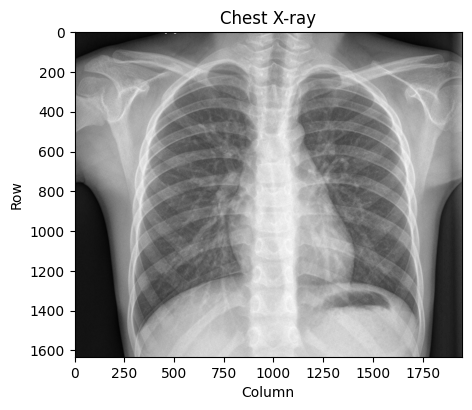

In [30]:
def plot_img(img, title=None):
    fig, axes = plt.subplots(figsize=(5,5))
    axes.imshow(img, cmap='gray')
    axes.set_xlabel('Column')
    axes.set_ylabel('Row')
    axes.set_title(title)

plot_img(im, 'Chest X-ray')

* Crop the image to a center square of size 1600x1600 (Hint: start by calculating the boundaries)

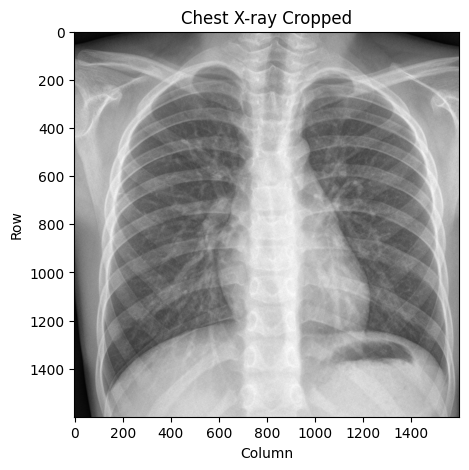

In [31]:
w = 1600
h = 1600
start_x = im.shape[1]//2 - w//2
start_y = im.shape[0]//2 - h//2
im_crop = im[start_y:start_y+h, start_x:start_x+w]

plot_img(im_crop, 'Chest X-ray Cropped')

* Resize the image to be of the shape (512, 512)

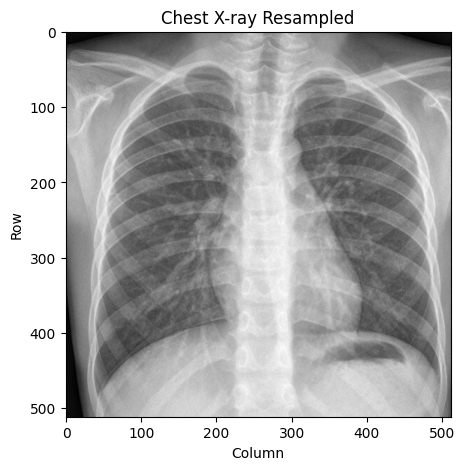

In [32]:
resampled_im = cv2.resize(im_crop, (512, 512))
plot_img(resampled_im, 'Chest X-ray Resampled')

* Flip the image horizontally

In [ ]:
flipped_im = cv2.flip(im, 1)
plot_img(flipped_im, 'Chest X-ray Flipped')

* To improve the contrast of the image, we can employ [histogram equalization](https://en.wikipedia.org/wiki/Histogram_equalization). A method that smoothes out the histogram of the image

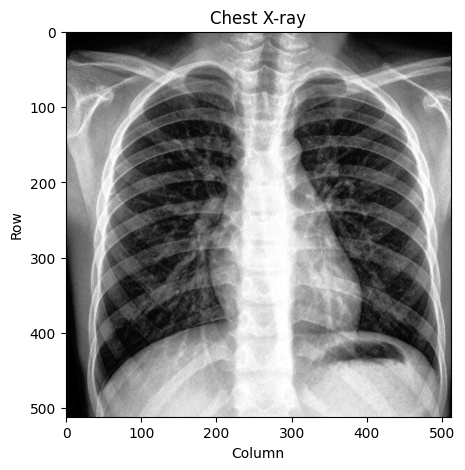

In [27]:
equalized_im = cv2.equalizeHist(resampled_im)
plot_img(equalized_im)

Text(0.5, 1.0, 'Equalized Histogram')

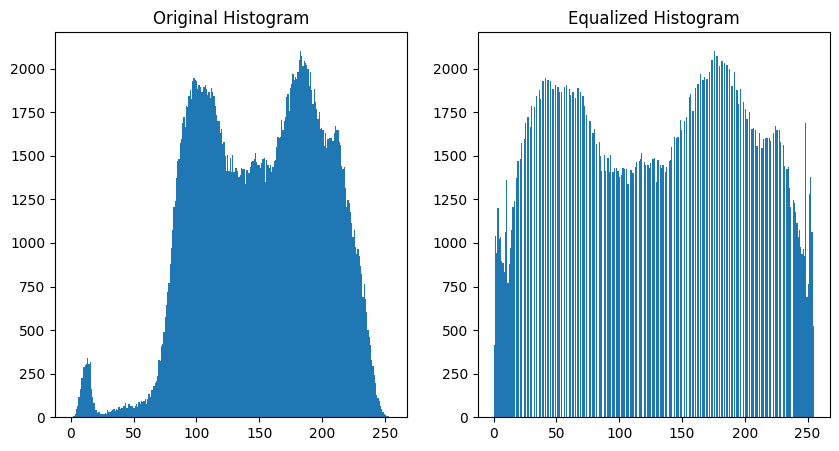

In [93]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].hist(resampled_im.flatten(), bins=256, range=(0, 255))
axes[0].set_title('Original Histogram')
axes[1].hist(equalized_im.flatten(), bins=256, range=(0, 255))
axes[1].set_title('Equalized Histogram')